# Lab 2
Eric Miao, Sabrina Peng, Fernando Vazquez

CS7324, Fall 2020

## 1. Business Understanding

### 1.1. Dataset Introduction
Casting is a manufacturing process in metalworking and jewelry making in which liquid metal is poured into, cooled, and removed from a mold containing a negative impression of an intended shape to produce a given product. The casting process is considered an old and influential industrial process that is used to make metal objects for much of modern infrastructure. According to the [American Foundry Society](https://www.afsinc.org/about-metalcasting), 90% of all manufactured goods contain metal castings, and most people are "rarely more than 10 feet away from a casting." Metalcasting is a $44.3 billion industry, providing nearly 200,000 jobs in the United States, so the process is a crucial component of the manufacturing space and pipeline.

The [selected dataset](https://www.kaggle.com/ravirajsinh45/real-life-industrial-dataset-of-casting-product) contains images of impellers that were metalcast to be used in submersible pumps. Submersible pumps are pumping devices used in heavy old field applications, and the impellers are parts of the pumps that allow fluid to be moved via rotation. The images are 300 x 300 pixels and gray-scaled, with augmentation applied, and are of clear quality due to stable lighting being applied when the images were captured. The subset of the dataset that we use in this notebook to conduct PCA and feature detection (the training dataset) contain 3758 images of defective metalcast impellers and 2875 images of non-defective metalcast impellers.


### 1.2. Dataset Significance and Prediction Task
The images in this dataset were collected in order to find a way to automate the casting result inspection process, in which products with defects from casting (including blow holes, pinholes, burr, shrinkage defects, mould material defects, metallurgical defects, etc.) are detected and removed. Most manufacturing companies employ a quality assurance department to carry out a manual inspection process, which is slow and costly. A company can incur financial losses if its quality assurance workers do not catch casting issues, which results in order rejections and damaged reputation.

The prediction task, therefore, is a binary classification task - manufacturing companies are looking to build a machine learning model that is able to look at an image of a metal casting and determine whether the product is defective or non-defective. The automated process could potentially save companies hours and payment for man-labor, as well as increase the accuracy of defect detection in order to avoid order losses. If successful, this type of manufacturing image prediction algorithm would increase the efficiency and operability of companies that produce items we use in everyday life. The algorithm could also be beneficially applied in other areas, processes, and industries besides metalcasting. 

In order for the prediction algorithm to be deemed successful, the accuracy of the algorithm in detecting defects would need to be better than the defect detection rate of human quality assurance workers currently engaging in the manual inspection process. Data on this can be collected over time in order to compare the performance of the processes to see if the manual process is worth being replaced by an automated one.

## 2. Data Preparation

In [1]:
import pandas as pd
import numpy as np
import zipfile
import os

ZIP_FILE_ONLY = False

if ZIP_FILE_ONLY:
    dataset_path = "../manufacturing_dataset.zip"
    directory = "../manufacturing_dataset"

    with zipfile.ZipFile(dataset_path, 'r') as zip_ref:
        zip_ref.extractall(directory)

In [2]:
import matplotlib.pyplot as plt
from PIL import Image

RESIZE_IMAGES = True
IMAGE_NEW_SIZE = 100

ok_front_images_train_dir = "./manufacturing_dataset/casting_data/casting_data/train/ok_front/"
def_front_images_train_dir = "./manufacturing_dataset/casting_data/casting_data/train/def_front/"
ok_front_images_test_dir = "./manufacturing_dataset/casting_data/casting_data/test/ok_front/"
def_front_images_test_dir = "./manufacturing_dataset/casting_data/casting_data/test/def_front/"

ok_front_images_train_list = [ok_front_images_train_dir + file for file in os.listdir(ok_front_images_train_dir)]
def_front_images_train_list = [def_front_images_train_dir + file for file in os.listdir(def_front_images_train_dir)]
ok_front_images_test_list = [ok_front_images_test_dir + file for file in os.listdir(ok_front_images_test_dir)]
def_front_images_test_list = [def_front_images_test_dir + file for file in os.listdir(def_front_images_test_dir)]

In [3]:
# linearize and save non-defective and defective training image data 
ok_front_image_train_data = []
def_front_image_train_data = []

for ok_front_image in ok_front_images_train_list:
    image = Image.open(ok_front_image)
    if RESIZE_IMAGES:
        image = image.resize((IMAGE_NEW_SIZE, IMAGE_NEW_SIZE))
    gr_image = image.convert('L')
    data = np.asarray(gr_image).flatten()
    ok_front_image_train_data.append(data)

for def_front_image in def_front_images_train_list:
    image = Image.open(def_front_image)
    if RESIZE_IMAGES:
        image = image.resize((IMAGE_NEW_SIZE, IMAGE_NEW_SIZE))
    gr_image = image.convert('L')
    data = np.asarray(gr_image).flatten()
    def_front_image_train_data.append(data)
    
X_train = np.array(ok_front_image_train_data + def_front_image_train_data)
Y_train = np.concatenate([np.zeros((len(ok_front_image_train_data),), dtype=int),
                          np.ones((len(def_front_image_train_data),), dtype=int)])

In [4]:
# linearize and save non-defective and defective testing image data 
ok_front_image_test_data = []
def_front_image_test_data = []

for ok_front_image in ok_front_images_test_list:
    image = Image.open(ok_front_image)
    if RESIZE_IMAGES:
        image = image.resize((IMAGE_NEW_SIZE, IMAGE_NEW_SIZE))
    gr_image = image.convert('L')
    data = np.asarray(gr_image).flatten()
    ok_front_image_test_data.append(data)

for def_front_image in def_front_images_test_list:
    image = Image.open(def_front_image)
    if RESIZE_IMAGES:
        image = image.resize((IMAGE_NEW_SIZE, IMAGE_NEW_SIZE))
    gr_image = image.convert('L')
    data = np.asarray(gr_image).flatten()
    def_front_image_test_data.append(data)
    
X_test = np.array(ok_front_image_test_data + def_front_image_test_data)
Y_test = np.concatenate([np.zeros((len(ok_front_image_test_data),), dtype=int),
                          np.ones((len(def_front_image_test_data),), dtype=int)])

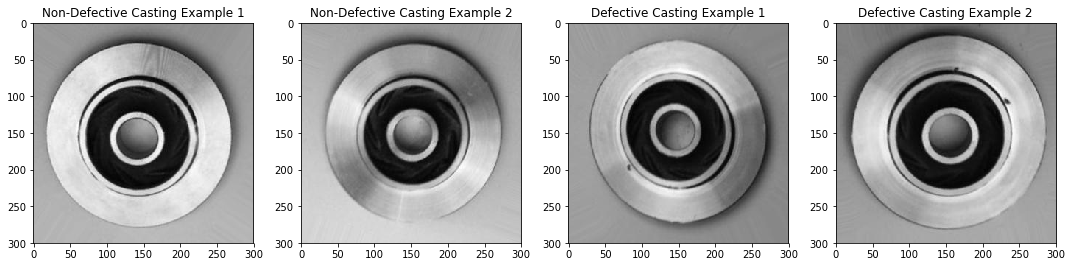

In [5]:
# visualize a few non-defective and defective cast images
ok_img_1 = Image.open(ok_front_images_train_list[0])
ok_img_2 = Image.open(ok_front_images_train_list[1])
def_img_1 = Image.open(def_front_images_train_list[0])
def_img_2 = Image.open(def_front_images_train_list[1])

f, axarr = plt.subplots(1,4, figsize=(15, 15)) 

axarr[0].imshow(ok_img_1)
axarr[1].imshow(ok_img_2)
axarr[2].imshow(def_img_1)
axarr[3].imshow(def_img_2)

# f.suptitle("Casting Image Visualizations")
axarr[0].set_title("Non-Defective Casting Example 1")
axarr[1].set_title("Non-Defective Casting Example 2")
axarr[2].set_title("Defective Casting Example 1")
axarr[3].set_title("Defective Casting Example 2")

f.tight_layout()

plt.show()

Here, we visualize a few non-defective and defective casting images. These images show that the average person would not be able to distinguish if a casting is defective or not. Workers with specialized knowledge would perform better, but let's see if we can do some image classification to increase defect detection accuracy.

## 3. Data Reduction

Here, we use PCA (principal components analysis) and randomized PCA to reduce the dimensionality of our data, which is very high due to the number of pixel features we have from linearizing our image data (10000 features, not including the target feature). We will compare PCA and randomized PCA to see which one gives us better results with fewer components.

### 3.1. PCA

In [6]:
from sklearn.decomposition import PCA

# helper methods taken from the 04. Dimension Reduction and Images class jupyter notebook
# https://github.com/eclarson/MachineLearningNotebooks/blob/master/04.%20Dimension%20Reduction%20and%20Images.ipynb
def plot_explained_variance(pca):
    import plotly
    from plotly.graph_objs import Bar, Line
    from plotly.graph_objs import Scatter, Layout
    from plotly.graph_objs.scatter import Marker
    from plotly.graph_objs.layout import XAxis, YAxis
    plotly.offline.init_notebook_mode()
    
    explained_var = pca.explained_variance_ratio_
    cum_var_exp = np.cumsum(explained_var)
    
    plotly.offline.iplot({
        "data": [Bar(y=explained_var, name='individual explained variance'),
                 Scatter(y=cum_var_exp, name='cumulative explained variance')
            ],
        "layout": Layout(xaxis=XAxis(title='Principal components'), yaxis=YAxis(title='Explained variance ratio'))
    })
    
def reconstruct_image(trans_obj,org_features):
    low_rep = trans_obj.transform(org_features)
    rec_image = trans_obj.inverse_transform(low_rep)
    return low_rep, rec_image

In [7]:
# run traditional PCA

h = 100
w = 100
n_components=150
pca = PCA(n_components=n_components)
%time pca.fit(X_train.copy()) 
eigenDefects = pca.components_.reshape((n_components, 100,100 ))

CPU times: user 11.4 s, sys: 352 ms, total: 11.8 s
Wall time: 11.8 s


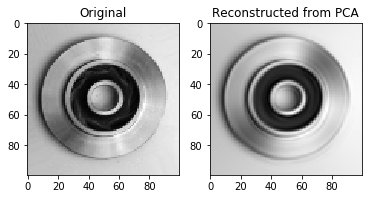

In [8]:
# visualize traditional PCA reconstruction for one image

idx_to_reconstruct = 8
X_idx = X_train[idx_to_reconstruct]
low_dimensional_representation, reconstructed_image = reconstruct_image(pca, X_idx.reshape(1, -1))

plt.subplot(1,2,1)
plt.imshow(X_idx.reshape((h, w)), cmap=plt.cm.gray)
plt.title('Original')
plt.grid(False)
plt.subplot(1,2,2)
plt.imshow(reconstructed_image.reshape((h, w)), cmap=plt.cm.gray)
plt.title('Reconstructed from PCA')
plt.grid(False)

In [9]:
plot_explained_variance(pca)

First, we use traditional PCA to find the number of principal components needed to explain the variance in our image data. As an example, we visualize the results from reconstructing the original image to the reconstructed image from PCA. 

After performing linear dimensionality reduction on the images using PCA, we visualize the explained variance. From the visualization, we can conclude that using 35 principal components to get 80% of the representation of the image is adequate. We arrived at this conclusion by looking at how many components are needed to get to 90% and we saw that we needed 100 components. From this, we can conclude that it is best to use 35 components to keep dimensionality low while keeping enough variance in the dataset.

### 3.2. Randomized PCA

Randomized PCA is a version of PCA that partially constructs the covariance matrix with a lower rank matrix in order to handle cases in which the number of dimensions is very large. The lower rank matrix allows us to apply computationally efficient methods to approximate our full eigenvectors, resulting in a performance boost.

In [10]:
pcaR = PCA(n_components=n_components, svd_solver='randomized')
%time pcaR.fit(X_train.copy()) 
eigenDefectsR = pcaR.components_.reshape((n_components, 100, 100))

CPU times: user 11.6 s, sys: 341 ms, total: 11.9 s
Wall time: 11.9 s


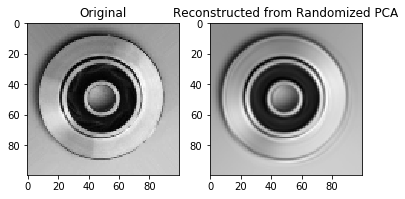

In [11]:
# visualize randomized PCA reconstruction for one image

idx_to_reconstruct = 2
X_idx = X_train[idx_to_reconstruct]
low_dimensional_representation, reconstructed_image2 = reconstruct_image(pcaR, X_idx.reshape(1, -1))
plt.subplot(1,2,1)
plt.imshow(X_idx.reshape((h, w)), cmap=plt.cm.gray)
plt.title('Original')
plt.grid(False)
plt.subplot(1,2,2)
plt.imshow(reconstructed_image2.reshape((h, w)), cmap=plt.cm.gray)
plt.title('Reconstructed from Randomized PCA')
plt.grid(False)

In [12]:
plot_explained_variance(pcaR)

We went through the same process again, but with a randomized PCA technique instead of traditional PCA. 

After performing linear dimensionality reduction on the images using randomized PCA, we visualized the explained variance. From the visualization, we can conclude that using 35 principal components to get 80% of the representation of the image is, again, adequate. We arrived at this conclusion by looking at how many components are needed to get to 90% and we saw that we needed 100 components. From this, we can conclude that, similar to traditional PCA, it would be best to use 35 components.

### 3.3 PCA and Randomized PCA Comparison

Here, we compare the traditional PCA and randomized PCA approaches to see which one quantitatively gives us better representations of the images with fewer components. We saw above that the number of principal components to achieve 80% and 90% explained variance are the same for both approaches, so we will see if we can determine which method is better below.

In order to do a quantitative comparison between PCA and randomized PCA, we needed to find a metric that would be able to show the similarity of the two images. If we used mean squared error, it would not tell us if the pictures looked similarly only the difference between the pixels. We decided to use structural similarity instead since it would be able to take into account the image as a whole.

We learned how to use structural similarity from [this scikit-image example](https://scikit-image.org/docs/dev/auto_examples/transform/plot_ssim.html).

In [13]:
from skimage import data, img_as_float
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import mean_squared_error

In [17]:
mseorg = 0
msePCAavg = 0
msePCARavg = 0
ssimorg = 0
ssimPCAavg = 0
ssimPCARavg = 0

for i in range(0, len(X_train)):
    X_idx = X_train[i]
    
    # first reconstruct the images from PCA and RPCA
    l, reconstructed_image_pca = reconstruct_image(pca,X_idx.reshape(1, -1))
    l, reconstructed_image_pcaR = reconstruct_image(pcaR,X_idx.reshape(1, -1))
    
    # convert the images to floating point format
    originalimg=img_as_float(X_idx)
    pcaimg=img_as_float(reconstructed_image_pca)[0]
    pcaRimg=img_as_float(reconstructed_image_pcaR)[0]
    
    # calculate MSE
    mseorg = mean_squared_error(originalimg, originalimg)
    msePCA = mean_squared_error(originalimg, pcaimg)
    msePCAR = mean_squared_error(originalimg, pcaRimg)
    
    # calculate structural similarity
    ssim_org = ssim(originalimg, originalimg, data_range=originalimg.max() - originalimg.min())
    ssim_PCA = ssim(originalimg, pcaimg, data_range=pcaimg.max() - pcaimg.min())
    ssim_PCAR = ssim(originalimg, pcaRimg, data_range=pcaRimg.max() - pcaRimg.min())
    
    # sum the results
    mseorg += mseorg
    msePCAavg += msePCA
    msePCARavg += msePCAR
    ssimorg += ssim_org
    ssimPCAavg += ssim_PCA
    ssimPCARavg += ssim_PCAR

In [18]:
print("Mean Squared Error Original image:", mseorg / len(X_train))    
print("Mean Squared Error PCA:", msePCAavg / len(X_train))
print("Mean Squared Error Randomized PCA:", msePCARavg / len(X_train))
print("Structural Similarity Original Average:", ssimorg / len(X_train))
print("Structural Similarity PCA Average:", ssimPCAavg / len(X_train))
print("Structural Similarity Randomized PCA Average:", ssimPCARavg / len(X_train))

Mean Squared Error Original image: 0.0
Mean Squared Error PCA: 24073.785344436194
Mean Squared Error Randomized PCA: 24073.788126154122
Structural Similarity Original Average: 1.0
Structural Similarity PCA Average: 0.006464743136967299
Structural Similarity Randomized PCA Average: 0.006460626104082407


After calculating the averages for MSE and structural similarity, we can determine that traditional PCA is just a slightly better method to use for representing images with fewer components, as the structural similarity for traditional PCA is higher than that of randomized PCA. However, the difference is so small that either method could be used to represent images with fewer components / lower dimensionality with our dataset.

## 4. Feature Extraction - DAISY

### 4.1. Bag of Words

Here, we perform bag-of-words DAISY feature extraction on our image data, which allows us to extract DAISY descriptors based on gradient orientation histograms. The goal is to evaluate the use of DAISY as an image classification technique for our prediction task.

In [19]:
from skimage.feature import daisy
from skimage.io import imshow
from skimage.feature import daisy, match_descriptors

print("Total training sample size: ", len(X_train))

Total training sample size:  6633


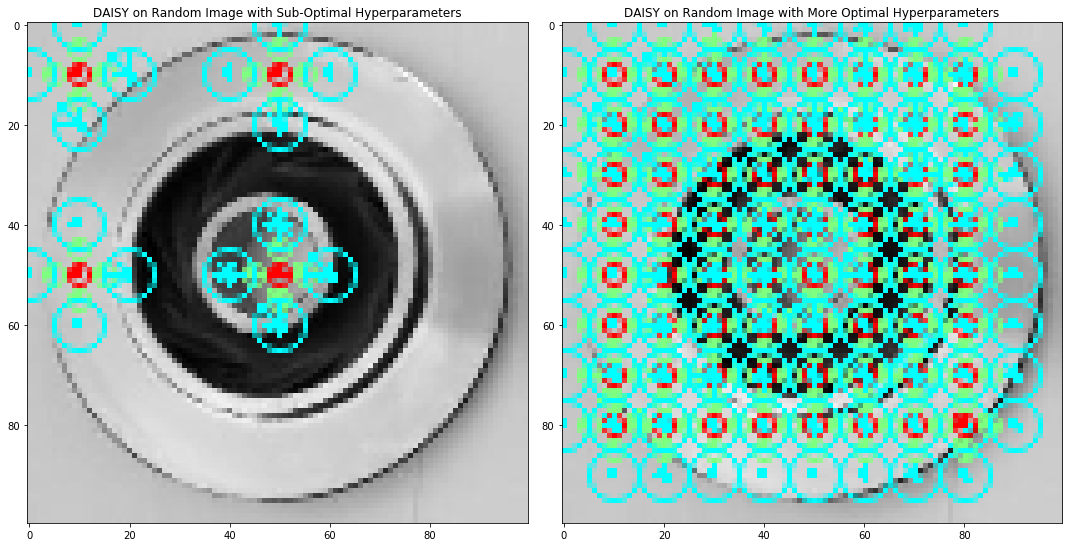

In [20]:
import random

# choose random image to perform DAISY on to test hyperparameter values
randIndex = random.randint(0, len(X_train))
h, w = (IMAGE_NEW_SIZE, IMAGE_NEW_SIZE)
img = X_train[randIndex].reshape(h,w)

features1, img_desc1 = daisy(img, step=40, radius=10, rings=2, histograms=4, orientations=8, visualize=True)
features2, img_desc2 = daisy(img, step=10, radius=10, rings=2, histograms=4, orientations=8, visualize=True)

f, axarr = plt.subplots(1,2, figsize=(15, 10)) 

axarr[0].imshow(img_desc1)
axarr[1].imshow(img_desc2)

axarr[0].set_title("DAISY on Random Image with Sub-Optimal Hyperparameters")
axarr[1].set_title("DAISY on Random Image with More Optimal Hyperparameters")

f.tight_layout()
plt.show()

We use the `scikit-image` library's implementation of the DAISY feature extraction technique. Here, we visualize the DAISY coverage over a random image from the training dataset of casting images. We can see that decreasing the step size allows for greater coverage of the rings across the entire image in terms of computing and returning keypoints, while still maintaining decent computational performance.

In [21]:
# define function that returns extracted daisy features for an image as a vector
def apply_daisy(row, shape):
    feat = daisy(row.reshape(shape),step=10, radius=10, rings=2, histograms=4, orientations=8, visualize=False)
    return feat.reshape((-1))

# apply extraction to all training images
daisy_train_features = np.apply_along_axis(apply_daisy, 1, X_train, (h, w))
print(daisy_train_features.shape)

(6633, 4608)


In [22]:
from sklearn.metrics.pairwise import pairwise_distances

# find the pairwise distance between DAISY image features
%time dist_matrix = pairwise_distances(daisy_train_features)

CPU times: user 6.53 s, sys: 92.1 ms, total: 6.62 s
Wall time: 6.62 s


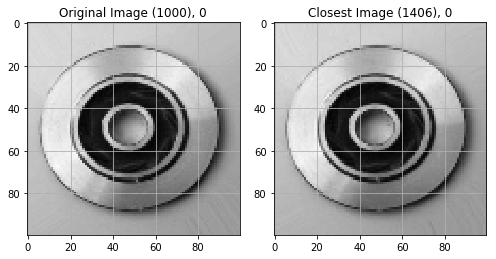

In [23]:
import copy

# find closest image for a defective training dataset image to visualize basic DAISY classification
idx1 = 1000
distances = copy.deepcopy(dist_matrix[idx1,:])
distances[idx1] = np.infty
idx2 = np.argmin(distances)

plt.figure(figsize=(7,10))
plt.subplot(1,2,1)
imshow(X_train[idx1].reshape((h, w)))
plt.title(f"Original Image ({idx1}), {Y_train[idx1]}")
plt.grid()

plt.subplot(1,2,2)
imshow(X_train[idx2].reshape((h, w)))
plt.title(f"Closest Image ({idx2}), {Y_train[idx2]}")
plt.grid()

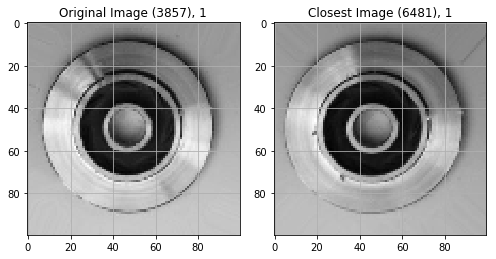

In [24]:
idx3 = 3857
distances = copy.deepcopy(dist_matrix[idx3,:])
distances[idx3] = np.infty
idx4 = np.argmin(distances)

plt.figure(figsize=(7,10))
plt.subplot(1,2,1)
imshow(X_train[idx3].reshape((h, w)))
plt.title(f"Original Image ({idx3}), {Y_train[idx3]}")
plt.grid()

plt.subplot(1,2,2)
imshow(X_train[idx4].reshape((h, w)))
plt.title(f"Closest Image ({idx4}), {Y_train[idx4]}")
plt.grid()

The above code displays a random image from the training data and its closest image (in terms of minimization of DAISY keypoint distances). The first two images show a chosen non-defective casting image and its closest image, which is also non-defective. The last two images show a chosen defective casting image and its closest image, which is also defective. Though this is a very simple visualization, this shows that the DAISY matching feature extraction technique may have promise.

Next we evaluate the DAISY technique using comparison of accuracy to a k-nearest neighbor model and visualization of a heatmap of pairwise distances of the extracted features.

### 4.1.1 Evaluation - Compare Accuracy to K-Nearest Neighbor Model

In [25]:
# code source: https://scikit-learn.org/stable/modules/neighbors.html

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, Y_train)
Y_pred = neigh.predict(X_test)

print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.9762237762237762


In [26]:
daisy_test_features = np.apply_along_axis(apply_daisy, 1, X_test, (IMAGE_NEW_SIZE, IMAGE_NEW_SIZE))
dist_test_matrix = pairwise_distances(daisy_test_features)

In [27]:
daisy_pred = []
for i in range(0, len(X_test)):
    distances = copy.deepcopy(dist_test_matrix[i,:])
    distances[i] = np.infty
    targetIndex = np.argmin(distances)
    prediction = Y_test[targetIndex]
    daisy_pred.append(prediction)

In [28]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("DAISY Accuracy:", metrics.accuracy_score(Y_test, daisy_pred))
print("Compare KNN to DAISY:", metrics.accuracy_score(Y_pred, daisy_pred))

DAISY Accuracy: 0.8755244755244755
Compare KNN to DAISY: 0.8853146853146853


From the comparison to KNN above, we can see that DAISY shows some promise. For most of the images in the original dataset, the classifier can quickly find the next most similar image that is within the same class as the target image. The accuracy of KNN (K-nearest neighbor) from our preliminary testing is around 97% and the accuracy of DAISY from our preliminary testing is around 88%. We compare the predictions from daisy to the predictions from KNN, and there is a 90% of matching between the two. Based on these observations, we believe that even though KNN has higher accuracy, DAISY still does a decent job in classifying defective and non-defective casting images. DAISY can also find and group the same-class items. Overall, DAISY could have great potential in our business, but this technique should not be the only one we rely on to achieve above 90% accuracy.

### 4.1.2. Pairwise Distance Heatmap

In [29]:
all_daisy_features = np.vstack((daisy_train_features, daisy_test_features))
all_dist_matrix = pairwise_distances(all_daisy_features)

In [30]:
print("Number of Training Images: ", len(X_train))
print("Number of Training Images: ", len(X_test))

# lower boundary is inclusive, upper boundary is exclusive (ex. [0, 25))
ok_training_idx = len(ok_front_images_train_list)
def_training_idx = ok_training_idx + len(def_front_images_train_list)
print("Indices of non-defective training image features: ", "0 -", ok_training_idx)
print("Indices of defective training image features: ", ok_training_idx, "-", def_training_idx)

ok_testing_idx = def_training_idx + len(ok_front_images_test_list)
def_testing_idx = ok_testing_idx + len(def_front_images_test_list)
print("Indices of non-defective testing image features: ", def_training_idx, "-", ok_testing_idx)
print("Indices of defective testing image features: ", ok_testing_idx, "-", def_testing_idx)

Number of Training Images:  6633
Number of Training Images:  715
Indices of non-defective training image features:  0 - 2875
Indices of defective training image features:  2875 - 6633
Indices of non-defective testing image features:  6633 - 6895
Indices of defective testing image features:  6895 - 7348


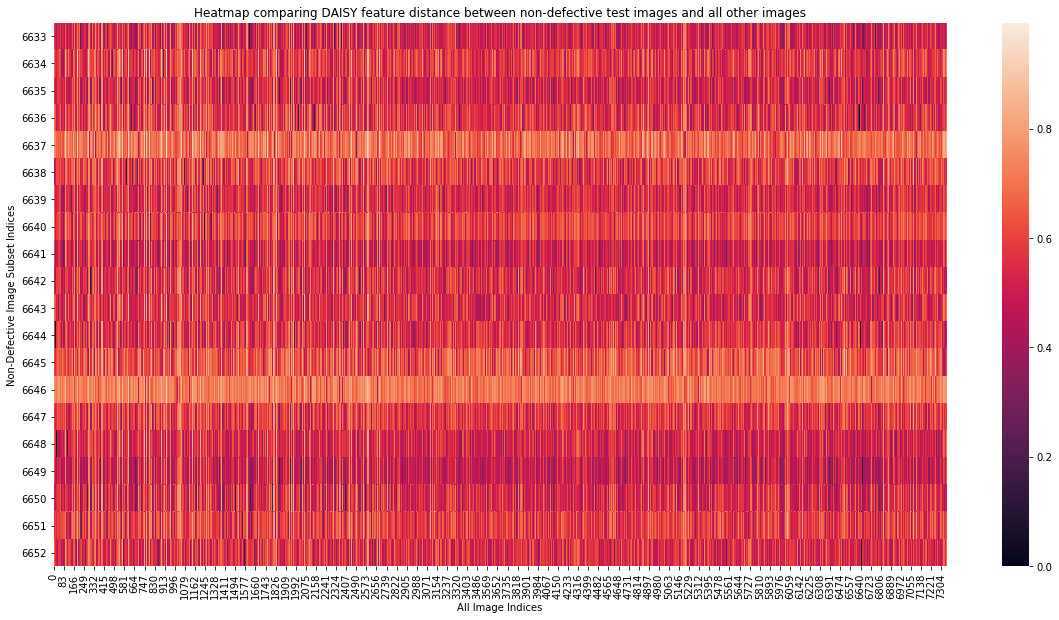

In [31]:
import seaborn as sns
num_images_in_subset = 20

# plot legible heatmap for 20 instances of non-defective testing images
ok_subset_start = 6633
seaborn_ok_image_subset = all_dist_matrix[ok_subset_start:ok_subset_start + num_images_in_subset]

y_axis_labels = range(ok_subset_start, ok_subset_start + num_images_in_subset)

plt.figure(figsize=(20, 10))
plt.title("Heatmap comparing DAISY feature distance between non-defective test images and all other images")
sns.heatmap(seaborn_ok_image_subset, yticklabels=y_axis_labels)
plt.xlabel("All Image Indices")
plt.ylabel("Non-Defective Image Subset Indices")
plt.yticks(rotation=0)
plt.grid(False)

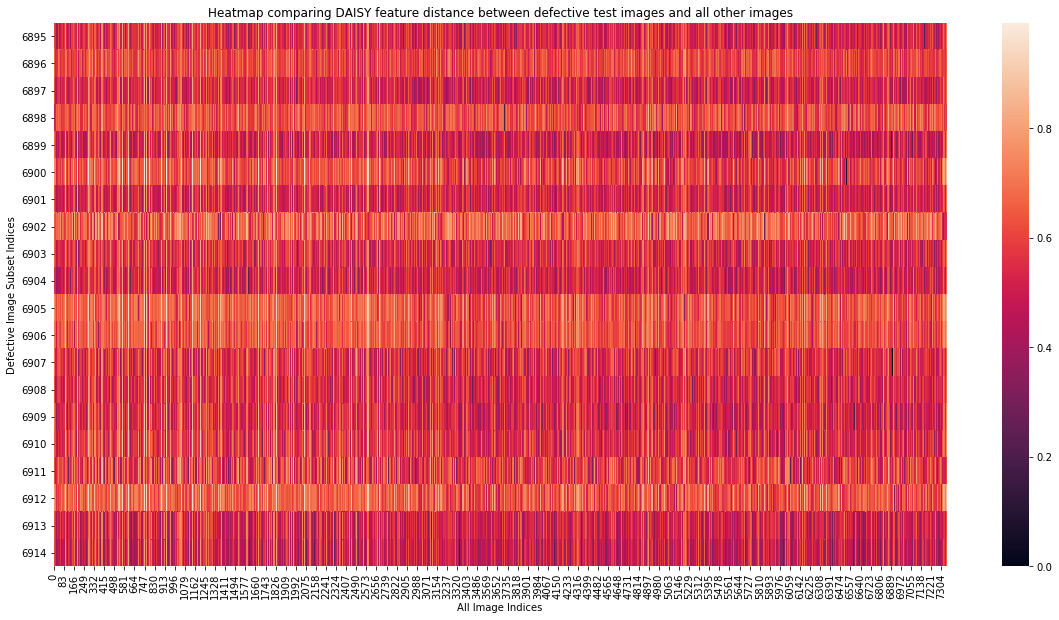

In [32]:
# plot legible heatmap for 20 instances of defective testing images
def_subset_start = 6895
seaborn_def_image_subset = all_dist_matrix[def_subset_start:def_subset_start + num_images_in_subset]

y_axis_labels = range(def_subset_start, def_subset_start + num_images_in_subset)

plt.figure(figsize=(20, 10))
plt.title("Heatmap comparing DAISY feature distance between defective test images and all other images")
sns.heatmap(seaborn_def_image_subset, yticklabels=y_axis_labels)
plt.xlabel("All Image Indices")
plt.ylabel("Defective Image Subset Indices")
plt.yticks(rotation=0)
plt.grid(False)

This evaluation technique seeks to utilize `seaborn` heatmaps to see if there are visually discernible patterns when comparing the pairwise distances of DAISY extracted feature vectors for subsets of the testing data against the extracted feeature vectors for all of the images. Only a subset of the test data was used for both the defective and non-defective heatmaps to maintain legibility. The goal was to find dark spots in particular spots of the heatmap (closer to 0 on the scale of the seaborn heatmap) to indicate similar source images for the selected test images.

For example, the first heatmap selects 20 non-defective test images. We would expect that the heatmap would show darker areas in the `[0 - 2875)` and `[6633 - 6895)` x-axis ranges, as these represent DAISY feature vectors extracted for non-defective casting images. Similarly, the second heatmap selects 20 defective test images, and we would expect that the heatmap would show darker areas in the `[2875 - 6633)` and `[6895 - 7348)` x-axis ranges for the defective casting image feature vectors.

Unfortunately, the heatmaps do not provide a great visualization of the effectiveness of DAISY feature extraction. Relying on a visual inspection of the heatmap in order to evaluate the performance of DAISY is not the best idea, as many feature vectors can be similar to each other even if they are not the best match. A quantitative method like the KNN one above would be more suited for DAISY technique evaluation.

### 4.2. Keypoint / Feature Matching

Here, we try to enhance our DAISY feature extraction technique results using feature matching that is dependent on keypoint location. Doing this would allow the algorithm to match similar keypoints across images, even if the similar keypoints (ex. the locations of the same eye in two images) are not in the same part of the images. This additional optimization is very effective for datasets in which there are great variations between locations of similar keypoints / keypoint matches, like face datasets.

In [33]:
# apply daisy and return keypoint features

def apply_daisy_kp(row, shape):
    feat = daisy(row.reshape(shape), step=10, radius=10, rings=3, histograms=4, orientations=8, visualize=False)
    return feat.reshape((feat.shape[0] * feat.shape[1], feat.shape[2]))

train_feature = apply_daisy_kp(X_train[0], (h, w))
train_feature.shape

(64, 104)

In [34]:
# get all keypoints in train and test datasets

daisy_train_keypoints = np.apply_along_axis(apply_daisy_kp, 1, X_train, (h, w))
print("DAISY Train Keypoints:", daisy_train_keypoints.shape)

daisy_test_keypoints = np.apply_along_axis(apply_daisy_kp, 1, X_test, (h, w))
print("DAISY Test Keypoints:", daisy_test_keypoints.shape)

DAISY Train Keypoints: (6633, 64, 104)
DAISY Test Keypoints: (715, 64, 104)


In [35]:
# select a subset of the test data and compute match values across all source image keypoints
# subset selected contains 50 non-defective images and 50 defective images
# may take a while - computationally expensive

train_kp_subset = daisy_train_keypoints[:]
test_subset_start = 212
test_subset_size = 100
test_kp_subset = daisy_test_keypoints[test_subset_start:test_subset_start + test_subset_size]

final_matches = {}

for test_idx, test_img_kps in enumerate(list(test_kp_subset)):
    match_values = []
    for train_idx, train_img_kps in enumerate(list(train_kp_subset)):
        matches = match_descriptors(test_img_kps, train_img_kps)
        match_values.append(len(matches))
    
    # get best source image match based on maximum # of keypoint matches made
    final_matches[test_idx] = np.argmax(np.array(match_values))

In [36]:
# compute accuracy of keypoint matching on data subset

num_correct_classifications = 0

print("Incorrect Matches:\n")

for test_img_idx, source_img_match_idx in final_matches.items():
    adjusted_test_img_idx = test_img_idx + test_subset_start
    if Y_test[adjusted_test_img_idx] == Y_train[source_img_match_idx]:
        num_correct_classifications += 1
    else:
        print(f"(test image index: {adjusted_test_img_idx}, source image index: {source_img_match_idx})")
        print("Expected:", Y_test[adjusted_test_img_idx], "Predicted:", Y_train[source_img_match_idx])
        print()
        
accuracy = num_correct_classifications / len(final_matches)
print("Accuracy: ", accuracy)

Incorrect Matches:

(test image index: 264, source image index: 378)
Expected: 1 Predicted: 0

(test image index: 271, source image index: 1607)
Expected: 1 Predicted: 0

(test image index: 278, source image index: 2692)
Expected: 1 Predicted: 0

(test image index: 281, source image index: 997)
Expected: 1 Predicted: 0

(test image index: 297, source image index: 2178)
Expected: 1 Predicted: 0

(test image index: 299, source image index: 57)
Expected: 1 Predicted: 0

(test image index: 311, source image index: 1854)
Expected: 1 Predicted: 0

Accuracy:  0.93


Above, we select a subset of the test data and compute match values using scikit-image's `match_descriptors` function, which allows for brute-force matching of descriptors between two sets of feature vectors. Only 100 test images are used (50 non-defective and 50 defective) because it is very computationally expensive to do brute-force matching. 

We first reshape the DAISY results to a proper shape to represent the keypoints and then calculate the number of keypoint matches for every `test image - source image` pair. Similar to normal location-insensitive DAISY, we choose the source image with the greatest number of keypoint matches as detected by `match_descriptors` as the best image match for the test image and store the matching results.

Then, we compute the accuracy of the keypoint matching on the data subset. We get a 93% accuracy, which means that we classified 93 out of 100 of the test images correctly. What is particularly interesting about our results is that all of our incorrect matches, as seen above, are Type II errors, where we classify a casting as non-defective when it is actually defective. This may be due to the fact that there are many types of casting defects, defects are typically hard to discern, and the resizing of the images from `300x300` to `100x100` for computational purposes may have affected the casting image quality.

Overall, keypoint matching seems to work very well with preventing Type I errors, but additional image classification techniques besides DAISY should be looked at and utilized in order to avoid Type II errors, which are more costly to manufacturing companies by way of returned orders, inconsistent manufacturing quality, and damaged reputation.